# PCA Reconstruction Error

Here we use the RMSE on the PCA reconstruction error to locate the annomalies.

Strong performance on the contaminated data set.

The contamination % needs to be parameterised for the training data. A few values are chosen for the uncontaminated data with lower values showing strong perfromance. The best performances was 100% recall and 93% precision.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data
contamination = 0.05 # percentage of outliers
n_train = 500       # number of training points
n_test = 500        # number of testing points
n_features = 6      # number of features
X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train, 
    n_test=n_test, 
    n_features= n_features, 
    contamination=contamination, 
    random_state=123)

#plot first 5 rows of train
X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

,0,1,2,3,4,5
0,2.396090,2.092611,2.073392,1.988262,1.953473,2.450997
1,1.631040,1.746182,1.898050,2.380148,1.967332,1.858916
2,1.824683,2.131412,2.028829,1.703454,2.502966,2.119108
3,2.106098,2.165173,2.340826,2.170109,1.749139,1.678661
4,1.829647,1.775596,1.829438,2.054768,1.577190,1.594549


The threshold for the defined contamination rate: 219.7719622259198


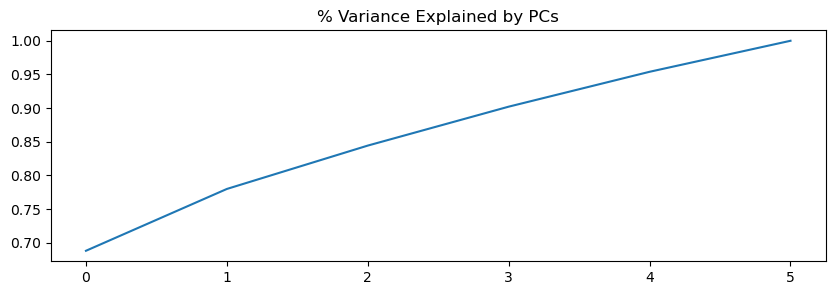

train metrics:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       475
         1.0       1.00      1.00      1.00        25

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

test metrics:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       475
         1.0       1.00      1.00      1.00        25

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [3]:

from pyod.models.pca import PCA
pca = PCA(contamination=0.05) 
pca.fit(X_train)

# Training data
y_train_scores = pca.decision_function(X_train)
y_train_pred = pca.predict(X_train)

# Test data
y_test_scores = pca.decision_function(X_test)
y_test_pred = pca.predict(X_test) # outlier labels (0 or 1)

# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , pca.threshold_)
plt.figure(figsize=(10,3))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('% Variance Explained by PCs')
plt.show()

from sklearn.metrics import classification_report
print('train metrics:')
print(classification_report(y_train, y_train_pred))
print('test metrics:')
print(classification_report(y_test, y_test_pred))

In [4]:
# what if we don't have outliers in the train set
X_train_inliers = X_train[y_train == 0]
y_train_inliers = y_train[y_train == 0]

# since the training data is uncontaminated but we have to provide a contamination rate to the model, lets try a few values

contam_vals = [0.01, 0.005, 0.001] # 1/100, 1/200, 1/1000

for c in contam_vals:
    pca = PCA(contamination=c) 
    pca.fit(X_train_inliers)

    # Test data
    y_test_scores = pca.decision_function(X_test)
    y_test_pred = pca.predict(X_test) # outlier labels (0 or 1)

    # Threshold for the defined comtanimation rate
    print(f'test metrics for uncontaminated data with c = {c}:')
    print(classification_report(y_test, y_test_pred))

test metrics for uncontaminated data with c = 0.01:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       475
         1.0       0.81      1.00      0.89        25

    accuracy                           0.99       500
   macro avg       0.90      0.99      0.94       500
weighted avg       0.99      0.99      0.99       500

test metrics for uncontaminated data with c = 0.005:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       475
         1.0       0.86      1.00      0.93        25

    accuracy                           0.99       500
   macro avg       0.93      1.00      0.96       500
weighted avg       0.99      0.99      0.99       500

test metrics for uncontaminated data with c = 0.001:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       475
         1.0       0.93      1.00      0.96        25

    accuracy            